In [3]:
import pandas as pd
import geopandas as gpd
from matplotlib import pyplot as plt
import numpy as np

In [2]:
landuse = gpd.read_file('MapPLUTO_UNCLIPPED.shp')
landuse.head()

,Borough,Block,Lot,CD,CT2010,CB2010,SchoolDist,Council,ZipCode,FireComp,...,FIRM07_FLA,PFIRM15_FL,Version,DCPEdited,Latitude,Longitude,Notes,Shape_Leng,Shape_Area,geometry
0,MN,1,10,101,5,1000,02,1,10004,E007,...,1,1,21v1,None,40.688799,-74.018675,None,0.0,9.041157e+06,"POLYGON ((981191.798 190877.393, 981020.336 19..."
1,MN,2,3,101,9,0001,None,1,0,None,...,1,1,21v1,t,40.700781,-74.010913,None,0.0,4.024003e+04,"POLYGON ((981288.593 194289.382, 981164.268 19..."
2,MN,3,2,101,9,1023,02,1,10004,L015,...,1,1,21v1,t,40.701780,-74.013633,None,0.0,1.404674e+04,"POLYGON ((980456.441 195042.573, 980458.399 19..."
3,MN,3,3,101,9,1020,02,1,10004,L015,...,1,1,21v1,t,40.701953,-74.013146,None,0.0,5.298613e+04,"POLYGON ((980713.169 194965.339, 980726.198 19..."
4,MN,5,7501,101,9,1017,02,1,10004,L015,...,1,1,21v1,None,40.702266,-74.010607,None,0.0,5.599025e+04,"POLYGON ((981187.166 194995.518, 981143.712 19..."


In [4]:
census = gpd.read_file('Census tract.shp')
census.head()

,boro_code,boro_ct201,boro_name,cdeligibil,ct2010,ctlabel,ntacode,ntaname,puma,shape_area,shape_leng,geometry
0,5,5000900,Staten Island,E,000900,9,SI22,West New Brighton-New Brighton-St. George,3903,2.497010e+06,7729.016794,"POLYGON ((-74.07921 40.64343, -74.07914 40.643..."
1,1,1009800,Manhattan,I,009800,98,MN19,Turtle Bay-East Midtown,3808,1.906016e+06,5534.199811,"POLYGON ((-73.96433 40.75638, -73.96479 40.755..."
2,1,1010200,Manhattan,I,010200,102,MN17,Midtown-Midtown South,3807,1.860993e+06,5687.802439,"POLYGON ((-73.97124 40.76094, -73.97170 40.760..."
3,1,1010400,Manhattan,I,010400,104,MN17,Midtown-Midtown South,3807,1.864600e+06,5693.036367,"POLYGON ((-73.97446 40.76229, -73.97491 40.761..."
4,1,1011300,Manhattan,I,011300,113,MN17,Midtown-Midtown South,3807,1.890907e+06,5699.860641,"POLYGON ((-73.98412 40.75484, -73.98460 40.754..."


In [5]:
landuse['Borough'].unique()

array(['MN', 'BX', 'BK', 'QN', 'SI'], dtype=object)

In [6]:
map_dic = {'MN':1, 'BX':2, 'BK':3, 'QN':4, 'SI':5}
landuse['boro_code'] = landuse['Borough'].map(map_dic)

In [7]:
landuse['CT2010'] = landuse['CT2010'].astype(float)
landuse['boro_ct201']=(landuse['boro_code']*1000000)+(landuse['CT2010']*100)
len(landuse['boro_ct201'].unique())

2175

In [8]:
#landuse['boro_ct201'] = landuse['boro_ct201'].astype(int)
census['boro_ct201'] = census['boro_ct201'].astype(float)

In [9]:
landuse2 = landuse[landuse.boro_ct201.isin(census.boro_ct201)]

In [11]:
landuse_census = landuse2.groupby(['boro_ct201','LandUse'], as_index = False).agg({'Shape_Area':'sum'})

In [12]:
landuse_census.head()

,boro_ct201,LandUse,Shape_Area
0,1000100.0,08,523721.101361
1,1000201.0,02,34123.215075
2,1000201.0,03,173790.734584
3,1000201.0,04,59767.347824
4,1000201.0,07,548833.182282


In [13]:
index = list(landuse_census.boro_ct201.unique())
columns = ['Residential', 'Residential & Commercial', 'Commercial & Office', 'Industrial & Manufacturing', 'Transportation & Utility', 'Public Facilities & Institutions', 'Open Space & Outdoor Recreation', 'Parking Facilities', 'Vacant Land']
Summary = pd.DataFrame(index = index, columns = columns)

In [14]:
Summary['Residential']=landuse_census[landuse_census['LandUse'].isin(['01','02','03'])].groupby('boro_ct201').sum()['Shape_Area']
Summary['Residential & Commercial']=landuse_census[landuse_census['LandUse'].isin(['04'])].groupby('boro_ct201').sum()['Shape_Area']
Summary['Commercial & Office']=landuse_census[landuse_census['LandUse'].isin(['05'])].groupby('boro_ct201').sum()['Shape_Area']
Summary['Industrial & Manufacturing']=landuse_census[landuse_census['LandUse'].isin(['06'])].groupby('boro_ct201').sum()['Shape_Area']
Summary['Transportation & Utility']=landuse_census[landuse_census['LandUse'].isin(['07'])].groupby('boro_ct201').sum()['Shape_Area']
Summary['Public Facilities & Institutions']=landuse_census[landuse_census['LandUse'].isin(['08'])].groupby('boro_ct201').sum()['Shape_Area']
Summary['Open Space & Outdoor Recreation']=landuse_census[landuse_census['LandUse'].isin(['09'])].groupby('boro_ct201').sum()['Shape_Area']
Summary['Parking Facilities']=landuse_census[landuse_census['LandUse'].isin(['10'])].groupby('boro_ct201').sum()['Shape_Area']
Summary['Vacant Land']=landuse_census[landuse_census['LandUse'].isin(['11'])].groupby('boro_ct201').sum()['Shape_Area']

In [15]:
Summary = Summary.fillna(0)

In [16]:
Summary['total_area'] = Summary.apply(lambda x:x.sum(), axis=1)
Summary.head()

,Residential,Residential & Commercial,Commercial & Office,Industrial & Manufacturing,Transportation & Utility,Public Facilities & Institutions,Open Space & Outdoor Recreation,Parking Facilities,Vacant Land,total_area
1000100.0,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,5.237211e+05,0.000000,0.000000,0.000000,5.237211e+05
1000201.0,2.079139e+05,5.976735e+04,0.000000,0.000000,548833.182282,1.917317e+05,112309.833258,8848.620871,8599.760196,1.138004e+06
1000202.0,1.131086e+06,3.683271e+04,34740.086406,0.000000,138557.965374,1.453929e+05,828622.578876,0.000000,39602.964811,2.354836e+06
1000500.0,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,9.041157e+06,0.000000,0.000000,0.000000,9.041157e+06
1000600.0,1.991570e+05,1.015112e+06,25236.534985,6779.727901,40985.000549,2.265942e+05,15650.548385,33990.239491,290722.400832,1.854227e+06


In [17]:
Summary_P = Summary.apply(lambda x: x/x.sum()*2, axis=1)

In [18]:
Summary_P.head()

,Residential,Residential & Commercial,Commercial & Office,Industrial & Manufacturing,Transportation & Utility,Public Facilities & Institutions,Open Space & Outdoor Recreation,Parking Facilities,Vacant Land,total_area
1000100.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.0
1000201.0,0.182700,0.052519,0.000000,0.000000,0.482277,0.168481,0.098690,0.007776,0.007557,1.0
1000202.0,0.480325,0.015641,0.014753,0.000000,0.058840,0.061742,0.351881,0.000000,0.016818,1.0
1000500.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.0
1000600.0,0.107407,0.547458,0.013610,0.003656,0.022104,0.122204,0.008440,0.018331,0.156789,1.0


# Entropy - Land use mix

In [19]:
from math import log
def entropy(x):
    entropy = 0
    hi = []
    for i in list(x):
        if i == 0:
            entropy = 0
        else:
            entropy = 0-i*log(i,2)
        hi.append(entropy)
    return sum(hi)

In [20]:
Summary_P['landuse_mix'] = Summary_P.apply(lambda x: entropy(x), axis=1)

In [21]:
Summary_P.head()

,Residential,Residential & Commercial,Commercial & Office,Industrial & Manufacturing,Transportation & Utility,Public Facilities & Institutions,Open Space & Outdoor Recreation,Parking Facilities,Vacant Land,total_area,landuse_mix
1000100.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.0,0.000000
1000201.0,0.182700,0.052519,0.000000,0.000000,0.482277,0.168481,0.098690,0.007776,0.007557,1.0,2.049058
1000202.0,0.480325,0.015641,0.014753,0.000000,0.058840,0.061742,0.351881,0.000000,0.016818,1.0,1.809595
1000500.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.0,0.000000
1000600.0,0.107407,0.547458,0.013610,0.003656,0.022104,0.122204,0.008440,0.018331,0.156789,1.0,2.010716


In [22]:
Summary_P.reset_index(drop=False, inplace=True)

In [23]:
Summary_P.head()

,index,Residential,Residential & Commercial,Commercial & Office,Industrial & Manufacturing,Transportation & Utility,Public Facilities & Institutions,Open Space & Outdoor Recreation,Parking Facilities,Vacant Land,total_area,landuse_mix
0,1000100.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.0,0.000000
1,1000201.0,0.182700,0.052519,0.000000,0.000000,0.482277,0.168481,0.098690,0.007776,0.007557,1.0,2.049058
2,1000202.0,0.480325,0.015641,0.014753,0.000000,0.058840,0.061742,0.351881,0.000000,0.016818,1.0,1.809595
3,1000500.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.0,0.000000
4,1000600.0,0.107407,0.547458,0.013610,0.003656,0.022104,0.122204,0.008440,0.018331,0.156789,1.0,2.010716


In [24]:
Summary_P['index'] = Summary_P['index'].astype(int)

In [25]:
Summary_P.rename(columns={'index':'boro_ct201'}, inplace=True)

In [26]:
Summary_P.head()

,boro_ct201,Residential,Residential & Commercial,Commercial & Office,Industrial & Manufacturing,Transportation & Utility,Public Facilities & Institutions,Open Space & Outdoor Recreation,Parking Facilities,Vacant Land,total_area,landuse_mix
0,1000100,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.0,0.000000
1,1000201,0.182700,0.052519,0.000000,0.000000,0.482277,0.168481,0.098690,0.007776,0.007557,1.0,2.049058
2,1000202,0.480325,0.015641,0.014753,0.000000,0.058840,0.061742,0.351881,0.000000,0.016818,1.0,1.809595
3,1000500,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.0,0.000000
4,1000600,0.107407,0.547458,0.013610,0.003656,0.022104,0.122204,0.008440,0.018331,0.156789,1.0,2.010716


In [35]:
Summary.reset_index(inplace=True)
Summary['index'] = Summary['index'].astype(int)
Summary.rename(columns={'index':'boro_ct201'}, inplace=True)

In [70]:
landuse_area = Summary_P.merge(Summary, on='boro_ct201', how='left')

In [73]:
landuse_area=landuse_area[['boro_ct201','landuse_mix','Residential_y','Residential & Commercial_y','Commercial & Office_y','Industrial & Manufacturing_y','Transportation & Utility_y','Public Facilities & Institutions_y','Open Space & Outdoor Recreation_y','Parking Facilities_y','Vacant Land_y','total_area_y']]

In [74]:
landuse_area.head()

,boro_ct201,landuse_mix,Residential_y,Residential & Commercial_y,Commercial & Office_y,Industrial & Manufacturing_y,Transportation & Utility_y,Public Facilities & Institutions_y,Open Space & Outdoor Recreation_y,Parking Facilities_y,Vacant Land_y,total_area_y
0,1000100,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,5.237211e+05,0.000000,0.000000,0.000000,5.237211e+05
1,1000201,2.049058,2.079139e+05,5.976735e+04,0.000000,0.000000,548833.182282,1.917317e+05,112309.833258,8848.620871,8599.760196,1.138004e+06
2,1000202,1.809595,1.131086e+06,3.683271e+04,34740.086406,0.000000,138557.965374,1.453929e+05,828622.578876,0.000000,39602.964811,2.354836e+06
3,1000500,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,9.041157e+06,0.000000,0.000000,0.000000,9.041157e+06
4,1000600,2.010716,1.991570e+05,1.015112e+06,25236.534985,6779.727901,40985.000549,2.265942e+05,15650.548385,33990.239491,290722.400832,1.854227e+06


In [75]:
landuse_mix = census.merge(landuse_area, on='boro_ct201', how='left')

In [76]:
landuse_mix.head()

,boro_code,boro_ct201,boro_name,cdeligibil,ct2010,ctlabel,ntacode,ntaname,puma,shape_area,...,Residential_y,Residential & Commercial_y,Commercial & Office_y,Industrial & Manufacturing_y,Transportation & Utility_y,Public Facilities & Institutions_y,Open Space & Outdoor Recreation_y,Parking Facilities_y,Vacant Land_y,total_area_y
0,5,5000900.0,Staten Island,E,000900,9,SI22,West New Brighton-New Brighton-St. George,3903,2.497010e+06,...,1.556923e+06,0.000000,6.747377e+03,0.000000,0.000000,167429.166668,91119.263528,3038.493656,70015.248315,1.895273e+06
1,1,1009800.0,Manhattan,I,009800,98,MN19,Turtle Bay-East Midtown,3808,1.906016e+06,...,5.113277e+05,491131.174216,2.134277e+05,0.000000,0.000000,86453.556594,6520.259646,0.000000,5234.820715,1.314095e+06
2,1,1010200.0,Manhattan,I,010200,102,MN17,Midtown-Midtown South,3807,1.860993e+06,...,0.000000e+00,85141.298575,9.875633e+05,0.000000,9979.866988,116083.593528,4322.329195,0.000000,1582.930130,1.204673e+06
3,1,1010400.0,Manhattan,I,010400,104,MN17,Midtown-Midtown South,3807,1.864600e+06,...,7.065873e+04,160256.590039,9.405529e+05,0.000000,0.000000,141366.229477,0.000000,4641.808243,24558.309187,1.342035e+06
4,1,1011300.0,Manhattan,I,011300,113,MN17,Midtown-Midtown South,3807,1.890907e+06,...,0.000000e+00,111920.637131,1.036033e+06,21948.766146,5226.695191,21085.614406,0.000000,0.000000,0.000000,1.196215e+06


In [78]:
landuse_mix = landuse_mix[['boro_ct201','landuse_mix','Residential_y','Residential & Commercial_y','Commercial & Office_y','Industrial & Manufacturing_y','Transportation & Utility_y','Public Facilities & Institutions_y','Open Space & Outdoor Recreation_y','Parking Facilities_y','Vacant Land_y','total_area_y','geometry']]

In [79]:
landuse_mix.head()

,boro_ct201,landuse_mix,Residential_y,Residential & Commercial_y,Commercial & Office_y,Industrial & Manufacturing_y,Transportation & Utility_y,Public Facilities & Institutions_y,Open Space & Outdoor Recreation_y,Parking Facilities_y,Vacant Land_y,total_area_y,geometry
0,5000900.0,0.972461,1.556923e+06,0.000000,6.747377e+03,0.000000,0.000000,167429.166668,91119.263528,3038.493656,70015.248315,1.895273e+06,"POLYGON ((-74.07921 40.64343, -74.07914 40.643..."
1,1009800.0,1.814459,5.113277e+05,491131.174216,2.134277e+05,0.000000,0.000000,86453.556594,6520.259646,0.000000,5234.820715,1.314095e+06,"POLYGON ((-73.96433 40.75638, -73.96479 40.755..."
2,1010200.0,0.929464,0.000000e+00,85141.298575,9.875633e+05,0.000000,9979.866988,116083.593528,4322.329195,0.000000,1582.930130,1.204673e+06,"POLYGON ((-73.97124 40.76094, -73.97170 40.760..."
3,1010400.0,1.425088,7.065873e+04,160256.590039,9.405529e+05,0.000000,0.000000,141366.229477,0.000000,4641.808243,24558.309187,1.342035e+06,"POLYGON ((-73.97446 40.76229, -73.97491 40.761..."
4,1011300.0,0.742205,0.000000e+00,111920.637131,1.036033e+06,21948.766146,5226.695191,21085.614406,0.000000,0.000000,0.000000,1.196215e+06,"POLYGON ((-73.98412 40.75484, -73.98460 40.754..."


<AxesSubplot:>

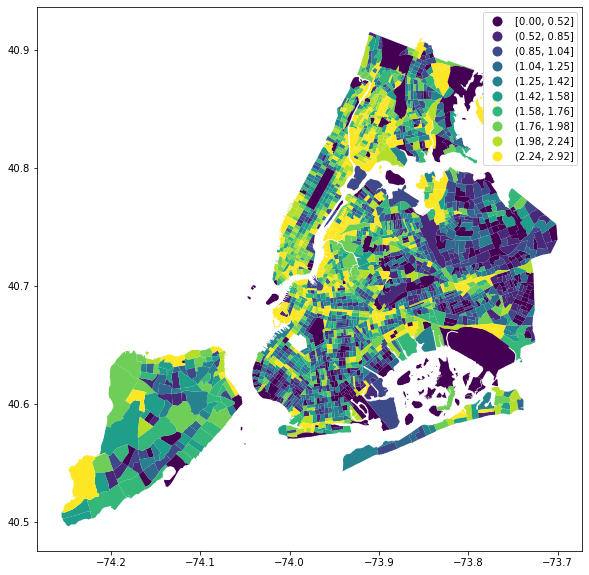

In [80]:
landuse_mix.plot(figsize=(10,10), column='landuse_mix', k=10, scheme='Quantiles',legend=True)

In [81]:
landuse_mix.rename(columns={'landuse_mix':'mix_index','Residential_y':'R_area','Residential & Commercial_y':'R&C_area','Commercial & Office_y':'C&O_area',
                                    'Industrial & Manufacturing_y':'Indus_area','Transportation & Utility_y':'Trans_area','Public Facilities & Institutions_y':'Faci_area',
                                    'Open Space & Outdoor Recreation_y':'Open_area','Parking Facilities_y':'Parki_area','Vacant Land_y':'Vacan_area','total_area_y':'Total_area'},inplace=True)

In [82]:
landuse_mix

,boro_ct201,mix_index,R_area,R&C_area,C&O_area,Indus_area,Trans_area,Faci_area,Open_area,Parki_area,Vacan_area,Total_area,geometry
0,5000900.0,0.972461,1.556923e+06,0.000000,6.747377e+03,0.000000,0.000000,167429.166668,91119.263528,3038.493656,7.001525e+04,1.895273e+06,"POLYGON ((-74.07921 40.64343, -74.07914 40.643..."
1,1009800.0,1.814459,5.113277e+05,491131.174216,2.134277e+05,0.000000,0.000000,86453.556594,6520.259646,0.000000,5.234821e+03,1.314095e+06,"POLYGON ((-73.96433 40.75638, -73.96479 40.755..."
2,1010200.0,0.929464,0.000000e+00,85141.298575,9.875633e+05,0.000000,9979.866988,116083.593528,4322.329195,0.000000,1.582930e+03,1.204673e+06,"POLYGON ((-73.97124 40.76094, -73.97170 40.760..."
3,1010400.0,1.425088,7.065873e+04,160256.590039,9.405529e+05,0.000000,0.000000,141366.229477,0.000000,4641.808243,2.455831e+04,1.342035e+06,"POLYGON ((-73.97446 40.76229, -73.97491 40.761..."
4,1011300.0,0.742205,0.000000e+00,111920.637131,1.036033e+06,21948.766146,5226.695191,21085.614406,0.000000,0.000000,0.000000e+00,1.196215e+06,"POLYGON ((-73.98412 40.75484, -73.98460 40.754..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2160,1004800.0,2.054405,4.901872e+05,196792.676428,2.656909e+04,0.000000,0.000000,343135.527474,175916.961176,4451.394054,7.678919e+03,1.244732e+06,"POLYGON ((-73.98020 40.73439, -73.98038 40.734..."
2161,3050600.0,1.418061,8.552437e+05,129224.899643,7.011046e+04,0.000000,32566.571841,115540.327757,0.000000,0.000000,2.373598e+03,1.205060e+06,"POLYGON ((-73.96219 40.64979, -73.96307 40.649..."
2162,3050801.0,1.442534,3.872800e+05,137649.497419,4.254080e+04,0.000000,8788.213449,24355.109412,0.000000,0.000000,0.000000e+00,6.006136e+05,"POLYGON ((-73.95871 40.65039, -73.95998 40.650..."
2163,1015700.0,1.379592,8.172069e+05,394134.346012,3.113302e+04,0.000000,20051.196183,63718.826137,0.000000,0.000000,0.000000e+00,1.326244e+06,"POLYGON ((-73.97500 40.77753, -73.97546 40.776..."


In [88]:
landuse_mix.to_file('landuse_census.shp')